# Plots for complex Gaussian and column-unitary matrices

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
import time, pickle
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
alphas_se = {'gaussian':None,'unitary':None}
alphas_gvamp = {'gaussian':None,'unitary':None}
mses_uninformed = {'gaussian':None,'unitary':None}
mses_informed = {'gaussian':None,'unitary':None}
mses_gvamp = {'gaussian':None,'unitary':None}

## Loading Gaussian data

In [3]:
#State Evolution data
filename = "Data/results_se_complex_gaussian.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_se['gaussian'] = {'informed':results['alphas_informed'],'uninformed':results['alphas_uninformed']}
mses_uninformed['gaussian'] = results['mses_uninformed']
mses_informed['gaussian'] = results['mses_informed']

#Loading GVAMP data
filename = "Data/results_gvamp_complex_gaussian.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_gvamp['gaussian'] = results['alphas']
mses_gvamp['gaussian'] = {'all':{'mean':results['mses_gvamp_mean_all'],'std':results['mses_gvamp_std_all']},'cv_only':{'mean':results['mses_gvamp_mean_cv_only'],'std':results['mses_gvamp_std_cv_only']}}

## Loading unitary data

In [4]:
#State evolution Data
filename = "Data/results_se_complex_unitary.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_se['unitary'] =  {'informed':results['alphas'],'uninformed':results['alphas']}
mses_informed['unitary'] = results['mses_informed']
mses_uninformed['unitary'] = results['mses_uninformed']

#Some post processing to the SE data to add some trivial points
alphas_se['unitary']['uninformed'] = np.concatenate((alphas_se['unitary']['uninformed'],np.array([3.])))
alphas_se['unitary']['informed'] = np.concatenate((alphas_se['unitary']['informed'],np.array([3.])))
mses_informed['unitary'] = np.concatenate((mses_informed['unitary'],np.array([0.])))
mses_uninformed['unitary'] = np.concatenate((mses_uninformed['unitary'],np.array([0.])))

alphas_se['unitary']['uninformed'] = np.concatenate((np.array([0.]),alphas_se['unitary']['uninformed']))
alphas_se['unitary']['informed'] = np.concatenate((np.array([0.]),alphas_se['unitary']['informed']))
mses_informed['unitary'] = np.concatenate((np.array([1.]),mses_informed['unitary']))
mses_uninformed['unitary'] = np.concatenate((np.array([1.]),mses_uninformed['unitary']))

#Loading GVAMP data (all three ensembles)
alphas_gvamp['unitary'] = {'Haar':None,'DFT':None,'DFT_no_mask':None}
mses_gvamp['unitary'] = {'Haar':None,'DFT':None,'DFT_no_mask':None}
#Loading GVAMP data for Haar
filename = "Data/results_gvamp_complex_unitary_Haar.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_gvamp['unitary']['Haar'] = results['alphas']
mses_gvamp['unitary']['Haar'] = {'all':{'mean':results['Haar']['mses_mean_all'],'std':results['Haar']['mses_std_all']},'cv_only':{'mean':results['Haar']['mses_mean_converged_only'],'std':results['Haar']['mses_std_converged_only']}}
#Loading GVAMP data for DFT                          
filename = "Data/results_gvamp_complex_unitary_DFT.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()                                     
alphas_gvamp['unitary']['DFT'] = results['alphas']      
mses_gvamp['unitary']['DFT'] = {'all':{'mean':results['DFT']['mses_mean_all'],'std':results['DFT']['mses_std_all']},'cv_only':{'mean':results['DFT']['mses_mean_converged_only'],'std':results['DFT']['mses_std_converged_only']}}
#Loading GVAMP data for DFT_no_mask
filename = "Data/results_gvamp_complex_unitary_DFT_no_mask.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()                                     
alphas_gvamp['unitary']['DFT_no_mask'] = results['alphas']      
mses_gvamp['unitary']['DFT_no_mask'] = {'all':{'mean':results['DFT']['mses_mean_all'],'std':results['DFT']['mses_std_all']},'cv_only':{'mean':results['DFT']['mses_mean_converged_only'],'std':results['DFT']['mses_std_converged_only']}}

## The final plot

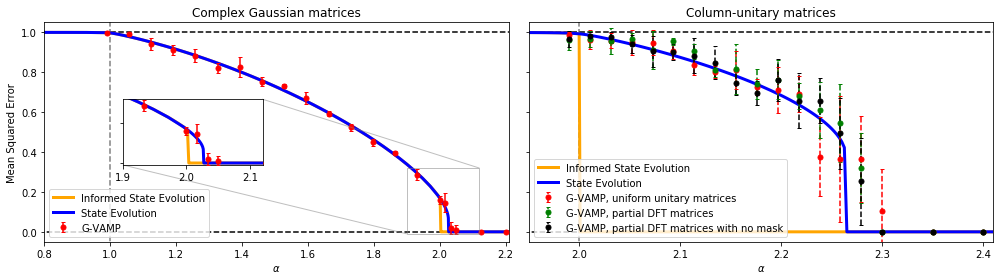

In [5]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(1,2,figsize=(14,4),sharey=True,gridspec_kw={'width_ratios': [3, 3]})
limits_inf = {'gaussian':0.8,'unitary':1.95}
limits_sup = {'gaussian':2.21,'unitary':2.41}
alpha_WR = {'gaussian':1.,'unitary':2.}

for (i_e,ensemble) in enumerate(['gaussian','unitary']):
    ax = axes[i_e]
    ax.set_xlim(limits_inf[ensemble], limits_sup[ensemble])
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$\alpha$')
    if i_e == 0:
        ax.set_ylabel(r'Mean Squared Error')
    if i_e == 0:
        ax.set_title(r'Complex Gaussian matrices')
    if i_e == 1:
        ax.set_title(r'Column-unitary matrices')
    ax.plot([alpha_WR[ensemble],alpha_WR[ensemble]],[-0.5,1.5],linestyle='--',color='grey',zorder=0)
    ax.plot([0.,3],[1.,1.],linestyle='--',color='black',zorder=0)
    ax.plot([0.,3],[0.,0.],linestyle='--',color='black',zorder=0)

    #State Evolution
    ax.plot(alphas_se[ensemble]['informed'],mses_informed[ensemble], label = "Informed State Evolution",zorder = 2, linewidth=3, color = 'orange')
    ax.plot(alphas_se[ensemble]['uninformed'],mses_uninformed[ensemble], label = "State Evolution",zorder = 2, linewidth=3, color = 'blue')
   
    #GVAMP
    if ensemble == 'gaussian':
        ax.errorbar(alphas_gvamp['gaussian'], mses_gvamp['gaussian']['all']['mean'], yerr = mses_gvamp['gaussian']['all']['std'], label = "G-VAMP", zorder = 4, color = 'red', fmt='o', markersize=5,capsize = 2)
    if ensemble == 'unitary':
        eb=ax.errorbar(alphas_gvamp['unitary']['Haar'],  mses_gvamp['unitary']['Haar']['all']['mean'], yerr = mses_gvamp['unitary']['Haar']['all']['std'], label = "G-VAMP, uniform unitary matrices", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'red')
        eb[-1][0].set_linestyle('--')
        eb=ax.errorbar(alphas_gvamp['unitary']['DFT'],  mses_gvamp['unitary']['DFT']['all']['mean'], yerr = mses_gvamp['unitary']['DFT']['all']['std'], label = "G-VAMP, partial DFT matrices", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'green')
        eb[-1][0].set_linestyle('--')
        eb=ax.errorbar(alphas_gvamp['unitary']['DFT_no_mask'],  mses_gvamp['unitary']['DFT_no_mask']['all']['mean'], yerr = mses_gvamp['unitary']['DFT_no_mask']['all']['std'], label = "G-VAMP, partial DFT matrices with no mask", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'black')
        eb[-1][0].set_linestyle('--')
        
    #For the Gaussian case we do a zoom on the transition
    if ensemble=='gaussian':
        axins = ax.inset_axes([0.17, 0.35, 0.3, 0.3])
        axins.set_xlim(1.9, 2.12)
        axins.set_ylim(-0.01, 0.32)
        #axins.set_xticklabels('')
        axins.set_yticklabels('')
        ax.indicate_inset_zoom(axins,label='')
        axins.plot(alphas_se[ensemble]['informed'],mses_informed[ensemble],zorder = 2, linewidth=3, color = 'orange')
        axins.plot(alphas_se[ensemble]['uninformed'],mses_uninformed[ensemble],zorder = 2, linewidth=3, color = 'blue')
        axins.errorbar(alphas_gvamp['gaussian'], mses_gvamp['gaussian']['all']['mean'], yerr = mses_gvamp['gaussian']['all']['std'], zorder = 4, color = 'red', fmt='o', markersize=5,capsize = 2)

    ax.legend(fancybox=True,loc='lower left')
plt.tight_layout()
plt.savefig("mse_complex_gaussian_unitary.pdf")

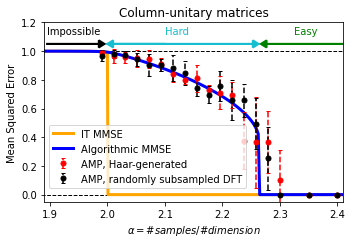

In [7]:
#FIXME (To remove, plot for the research statement)
import matplotlib.colors as mcolors 
colors_list = list(mcolors.TABLEAU_COLORS)
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
limit_inf = 1.89
limit_sup = 2.41
alpha_WR = 2.
ensemble = 'unitary'
ax.set_xlim(limit_inf,limit_sup)
ax.set_ylim(-0.05, 1.2)
ax.set_xlabel(r'$\alpha = \# samples /  \# dimension$')
ax.set_ylabel(r'Mean Squared Error')
ax.set_title(r'Column-unitary matrices')
#ax.plot([alpha_WR,alpha_WR],[-0.5,1.5],linestyle='--',color='grey',zorder=0)
ax.plot([0.,3],[1.,1.],linestyle='--',color='black',zorder=0, linewidth=1.)
ax.plot([0.,3],[0.,0.],linestyle='--',color='black',zorder=0, linewidth=1.)

#State Evolution
ax.plot(alphas_se[ensemble]['informed'],mses_informed[ensemble], label = "IT MMSE",zorder = 2, linewidth=3, color = 'orange')
ax.plot(alphas_se[ensemble]['uninformed'],mses_uninformed[ensemble], label = "Algorithmic MMSE",zorder = 2, linewidth=3, color = 'blue')

#GVAMP
eb=ax.errorbar(alphas_gvamp['unitary']['Haar'],  mses_gvamp['unitary']['Haar']['all']['mean'], yerr = mses_gvamp['unitary']['Haar']['all']['std'], label = "AMP, Haar-generated", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'red')
eb[-1][0].set_linestyle('--')
#eb=ax.errorbar(alphas_gvamp['unitary']['DFT'],  mses_gvamp['unitary']['DFT']['all']['mean'], yerr = mses_gvamp['unitary']['DFT']['all']['std'], label = "G-VAMP, partial DFT matrices", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'green')
#eb[-1][0].set_linestyle('--')
eb=ax.errorbar(alphas_gvamp['unitary']['DFT_no_mask'],  mses_gvamp['unitary']['DFT_no_mask']['all']['mean'], yerr = mses_gvamp['unitary']['DFT_no_mask']['all']['std'], label = "AMP, randomly subsampled DFT", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'black')
eb[-1][0].set_linestyle('--')

#ax.fill([-2.5,-2.5,-1.5,-1.5],[0,0.4,0.4,0],color=colors_list[7],alpha=0.3)
ax.arrow(2.0,1.05,0.263, 0.0,color = colors_list[9],head_width=0.05, head_length=0.01,alpha = 1., length_includes_head=True, zorder = 2,linewidth=2, clip_on = False)
ax.arrow(2.1,1.05,-0.1, 0.0,color = colors_list[9],head_width=0.05, head_length=0.01,alpha = 1., length_includes_head=True, zorder = 2,linewidth=2, clip_on = False)
ax.arrow(1.895,1.05,0.1, 0.0,color = 'black',head_width=0.05, head_length=0.01,alpha = 1., length_includes_head=True, zorder = 2,linewidth=2, clip_on = False)
ax.arrow(2.41,1.05, - 0.143, 0.0,color = 'green',head_width=0.05, head_length=0.01,alpha = 1., length_includes_head=True, zorder = 2,linewidth=2, clip_on = False)
#ax.arrow(2.0,1.05,0.263, 0.0,color = colors_list[9],head_width=0.05, head_length=0.01,alpha = 1., length_includes_head=True, zorder = 2,linewidth=2, clip_on = False)
ax.text(1.895,1.12,r'Impossible', zorder = 2,color='black')
ax.text(2.1,1.12,r'Hard', zorder = 2,color=colors_list[9])
ax.text(2.325,1.12,r'Easy', zorder = 2,color='green')


ax.legend(fancybox=True,loc = 'lower left',bbox_to_anchor=(0., 0.05))
plt.tight_layout()
plt.savefig("mse_unitary_research_statement.pdf")